# DATA DIRI

NAMA          : ENDOW BONAPEN

EMAIL         : 2010511010@mahasiswa.upnvj.ac.id

USERNAME      : endowb


Dataset : https://drive.google.com/drive/folders/19eddQyB67cYFG44nsEC7z_Ax59wqoUzs?usp=sharing

#IMPORT LIBRARY

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd

# LOAD DATASET

In [2]:
#Ambil dataset dari link diatas
from google.colab import drive
drive.mount('/content/drive')
link_data = "../content/drive/My Drive/Dataset Beras"

Mounted at /content/drive


# SPLIT DATA TO DATA TRAIN : 80% AND VALIDATION : 20%

In [3]:
# Using module split-folders
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders

input_folder = "/content/drive/My Drive/Dataset Beras"
output = "/content/dataset_dicoding" 

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2), group_prefix = None)

Copying files: 10000 files [03:12, 52.06 files/s]


In [5]:
#Create a variable to hold the train and validation data path
train_path = "/content/dataset_dicoding/train"
validation_path = "/content/dataset_dicoding/val"  

# CREATE DATA AUGMENTATION

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(192,192),#Resizing all images to 192x192 pixels
    batch_size = 32,
    color_mode='rgb',
    class_mode = 'categorical' #Because this dataset has 4 classes, namely Arborio, Basmati, Jasmine, Ipsala
)

val_generator = val_data_generator.flow_from_directory(
    validation_path,
    target_size=(192,192),#Resizing all images to 192x192 pixels
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical' #Because this dataset has 4 classes, namely Arborio, Basmati, Jasmine, Ipsala
)

Found 8000 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.


# MODELING CNN

In [43]:
from tensorflow.keras import metrics, Sequential, layers
METRICS = [
    metrics.CategoricalAccuracy(name='categorical_accuracy'),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
    metrics.AUC(name='prc', curve='PR')
]

model = Sequential([
    layers.Conv2D(32, (3, 3), activation = layers.ReLU(), padding = 'same', input_shape=(192, 192, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation = layers.ReLU(), padding = 'same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    layers.Conv2D(64, (3, 3), activation = layers.ReLU(), padding = 'same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation=layers.ReLU()),
    layers.Dense(4, activation = 'softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=METRICS)

# VISUALIZATION MODEL CNN

In [44]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


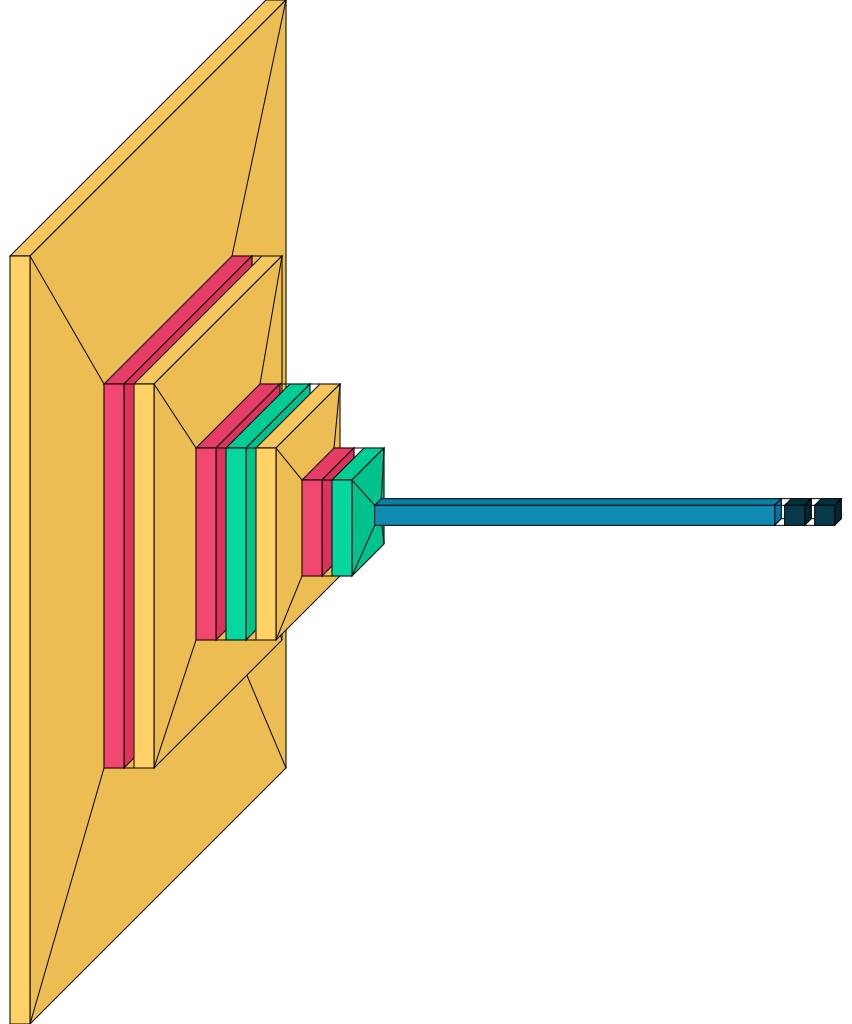

In [45]:
import visualkeras
visualkeras.layered_view(model).show()

visualkeras.layered_view(model, to_file='MODEL_CNN_DICODING_ENDOW.png').show()

visualkeras.layered_view(model)

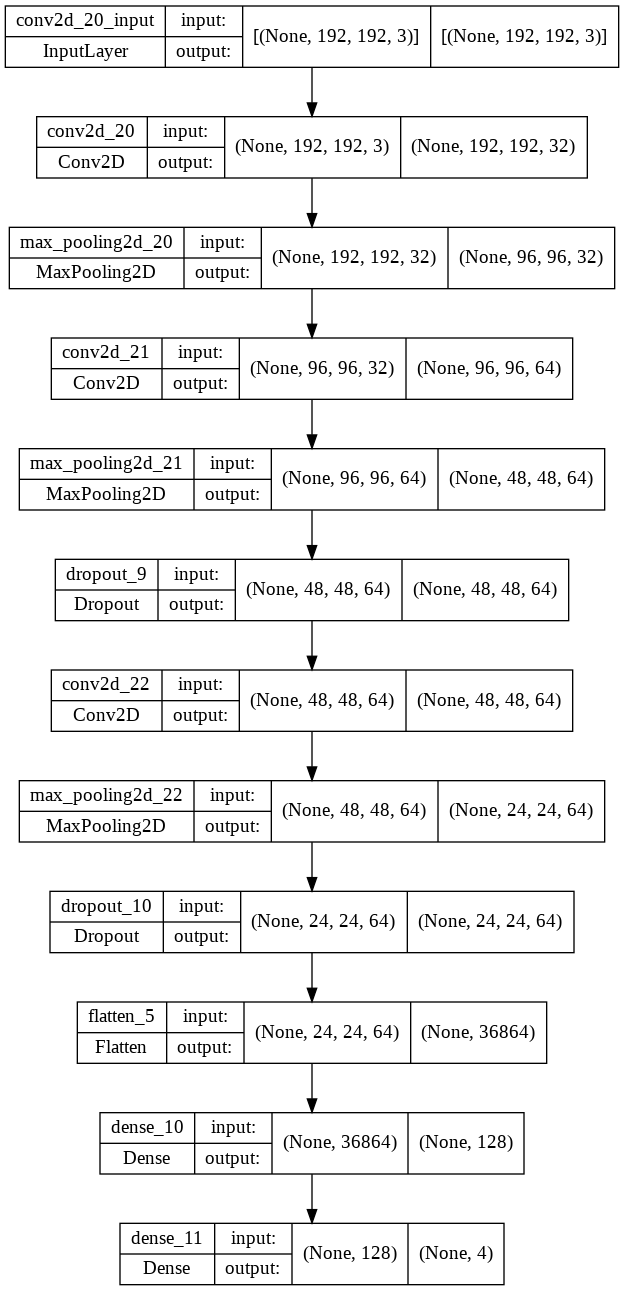

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='MODEL_CNN_DICODING_ENDOW.png', show_shapes=True)

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 192, 192, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 96, 96, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 48, 48, 64)       

# MODEL FITTING

In [48]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('categorical_accuracy') > 0.92 and logs.get('val_categorical_accuracy') > 0.92):
      print("\n Proses Training Di Stop Karena nilai akurasi dan validasi akurasi > 92%!")
      self.model.stop_training = True

my_callbacks = Callback()

In [49]:
hist = model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=35,
    callbacks = [my_callbacks])

Epoch 1/35
250/250 [==============================] - 601s 2s/step - loss: 0.3341 - categorical_accuracy: 0.8720 - precision: 0.8922 - recall: 0.8514 - auc: 0.9792 - prc: 0.9460 - val_loss: 0.1510 - val_categorical_accuracy: 0.9520 - val_precision: 0.9534 - val_recall: 0.9505 - val_auc: 0.9971 - val_prc: 0.9915
Epoch 2/35
250/250 [==============================] - ETA: 0s - loss: 0.2027 - categorical_accuracy: 0.9214 - precision: 0.9240 - recall: 0.9190 - auc: 0.9916 - prc: 0.9769
 Proses Training Di Stop Karena nilai akurasi dan validasi akurasi > 92%!
250/250 [==============================] - 598s 2s/step - loss: 0.2027 - categorical_accuracy: 0.9214 - precision: 0.9240 - recall: 0.9190 - auc: 0.9916 - prc: 0.9769 - val_loss: 0.1175 - val_categorical_accuracy: 0.9580 - val_precision: 0.9594 - val_recall: 0.9565 - val_auc: 0.9976 - val_prc: 0.9929


# VISUALIZATION PLOT ACCURACY AND LOSS MODEL FITTING

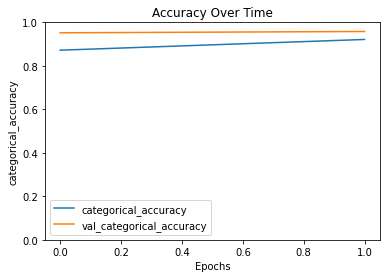

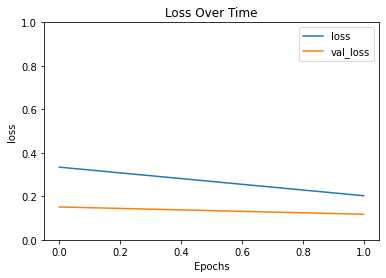

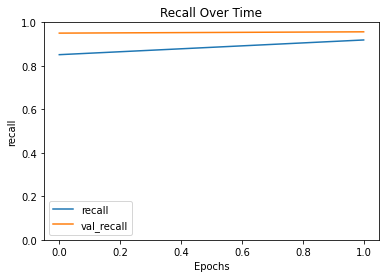

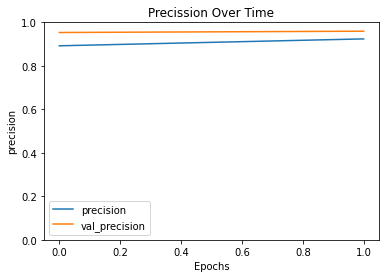

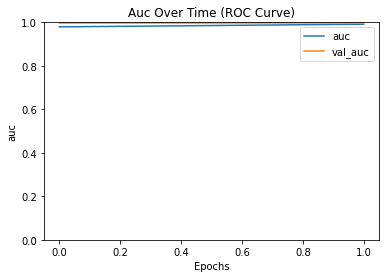

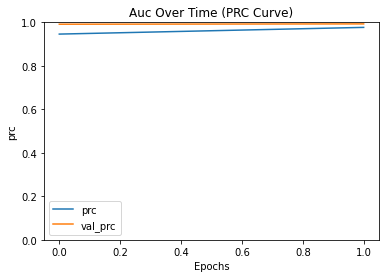

In [50]:
analisis_train = ['categorical_accuracy', 'loss', 'recall', 'precision', 'auc', 'prc']
analisis_val = ['val_categorical_accuracy', 'val_loss', 'val_recall','val_precision', 'val_auc', 'val_prc' ]
notes = ['Accuracy Over Time', 'Loss Over Time', 'Recall Over Time', 'Precission Over Time', 'Auc Over Time (ROC Curve)', 'Auc Over Time (PRC Curve)']

for analize in range(0, len(analisis_train)):
  plt.plot(hist.history[analisis_train[analize]], label=analisis_train[analize])
  plt.plot(hist.history[analisis_val[analize]], label = analisis_val[analize])
  plt.xlabel('Epochs')
  plt.ylabel(analisis_train[analize])
  plt.ylim(0, 1)
  plt.title(notes[analize])
  plt.legend()
  plt.show()

In [51]:
model.evaluate(train_generator) #Evaluasi Data Train

250/250 [==============================] - 202s 806ms/step - loss: 0.2063 - categorical_accuracy: 0.9252 - precision: 0.9286 - recall: 0.9227 - auc: 0.9924 - prc: 0.9788


[0.20626533031463623,
 0.9252499938011169,
 0.9285534620285034,
 0.9227499961853027,
 0.9924174547195435,
 0.9787918925285339]

In [52]:
model.evaluate(val_generator) #Evaluasi Data Validation

63/63 [==============================] - 35s 556ms/step - loss: 0.1175 - categorical_accuracy: 0.9580 - precision: 0.9594 - recall: 0.9565 - auc: 0.9976 - prc: 0.9929


[0.11754275858402252,
 0.9580000042915344,
 0.9593781232833862,
 0.9564999938011169,
 0.9975630044937134,
 0.9929444193840027]

# CONVERT TFLITE

In [53]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [54]:
# Menyimpan TFlite Model
with open('modelEndow.tflite', 'wb') as f:
  f.write(tflite_model)